<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.describe (include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

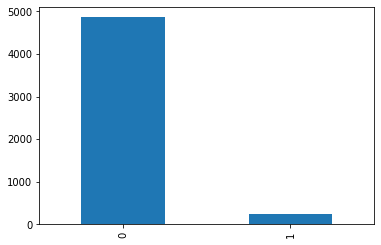

In [ ]:
df['stroke'].value_counts().plot(kind='bar') #imbalanced dataset, accuracy will not be a good measurement to evaluate. 

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df.shape

(5110, 11)

In [ ]:
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [ ]:
df.drop(index=3116, axis=0, inplace=True) #Dropping the person with "Other" in gender column to remove an outlier. 

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [ ]:
gender_map = {'Female':0, 'Male':1}

In [ ]:
df['gender_n'] = df['gender'].map(gender_map) 

In [ ]:
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [ ]:
married_map = {'No':0, 'Yes':1}

In [ ]:
df['ever_married_n']=df['ever_married'].map(married_map)

In [ ]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [ ]:
 df['Residence_type_n'] = df['Residence_type'].map({'Urban':0, 'Rural':1})

In [ ]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df.corr()['stroke'].sort_values(ascending=False)[1:]

age                  0.245239
heart_disease        0.134905
avg_glucose_level    0.131991
hypertension         0.127891
ever_married_n       0.108299
bmi                  0.042341
gender_n             0.009081
Residence_type_n    -0.015415
Name: stroke, dtype: float64

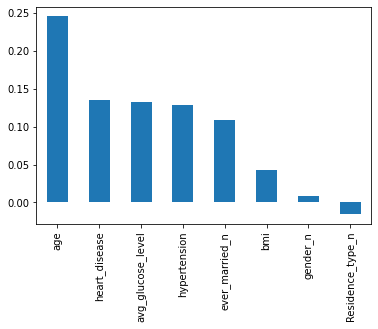

In [ ]:
df.corr()['stroke'].sort_values(ascending=False)[1:].plot(kind='bar')

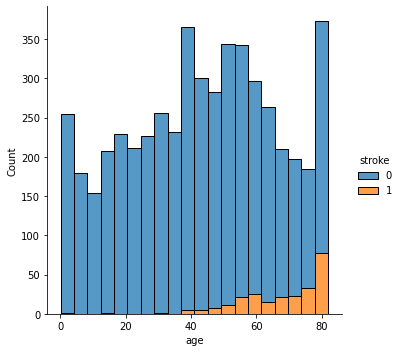

In [ ]:
sns.displot(data=df, x='age', hue='stroke', multiple='stack' )

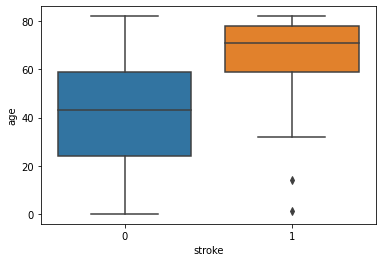

In [ ]:
sns.boxplot(data=df, x='stroke', y='age') 

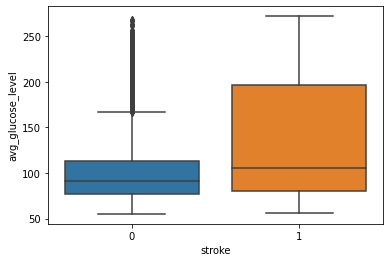

In [ ]:
sns.boxplot(data=df, x='stroke', y='avg_glucose_level')

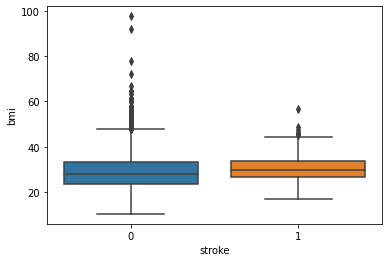

In [ ]:
sns.boxplot(data=df, x='stroke', y='bmi')

Categorical features

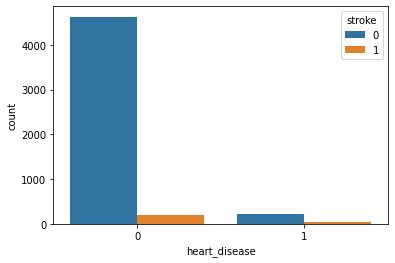

In [ ]:
sns.countplot(data=df, x='heart_disease', hue='stroke')

In [ ]:
def perct_stroke (col, var):
  return len(df[(df[col]==var)&(df['stroke']==1)])/len(df[df[col]==var]) *100

In [ ]:
perct_stroke('heart_disease',0) # % of patients with stroke among people without heart disease

4.179598593006414

In [ ]:
perct_stroke('heart_disease',1) # % of patients with stroke among people with heart disease

17.02898550724638

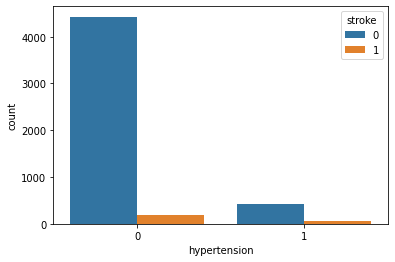

In [ ]:
sns.countplot(data=df, x='hypertension', hue='stroke')

In [ ]:
perct_stroke('hypertension',0) # % of patients with stroke among people without hypertension

3.9687703318152243

In [ ]:
 perct_stroke('hypertension',1) # % of patients with stroke among people with hypertension

13.253012048192772

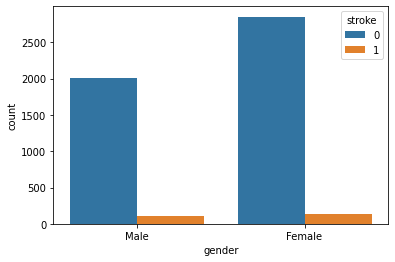

In [ ]:
sns.countplot(data=df, x='gender', hue='stroke')

In [ ]:
  perct_stroke('gender','Male') #. % of male with stroke among male

5.106382978723404

In [ ]:
perct_stroke('gender','Female') #. % of Female with stroke among Female

4.709418837675351

In [ ]:
df.describe (include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5109,5109,5109,5109,5109
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2924,2596,1892


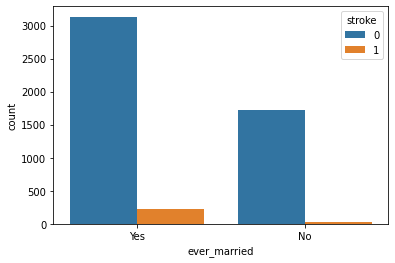

In [ ]:
sns.countplot(data=df, x='ever_married', hue='stroke')

In [ ]:
perct_stroke('ever_married','Yes')

6.56128839844915

In [ ]:
perct_stroke('ever_married','No')

1.6514806378132119

In [ ]:
#. People who ever married about 4times more likely had stroke than people who had never married. 

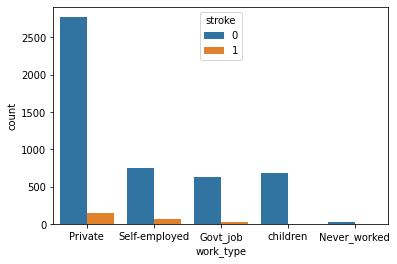

In [ ]:
sns.countplot(data=df, x='work_type', hue='stroke')

In [ ]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
for i in ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']:
  print(i, perct_stroke('work_type',i))

Private 5.095759233926129
Self-employed 7.936507936507936
Govt_job 5.0228310502283104
children 0.2911208151382824
Never_worked 0.0


In [ ]:
#. People with private, self-emplyed, and Govt job have more likely had stroke than people who worked with children or had no job. 

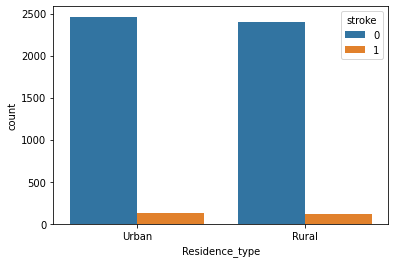

In [ ]:
sns.countplot(data=df, x='Residence_type', hue='stroke')

In [ ]:
perct_stroke('Residence_type','Urban')

5.200308166409862

In [ ]:
perct_stroke('Residence_type','Rural')

4.536410664544369

In [ ]:
#. No big difference between the residence types

In [ ]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
for i in ['formerly smoked', 'never smoked', 'smokes', 'Unknown']:
  print(i, perct_stroke('smoking_status',i))

formerly smoked 7.918552036199094
never smoked 4.7568710359408035
smokes 5.323193916349809
Unknown 3.0440414507772022


Missing values

In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
gender_n               0
ever_married_n         0
Residence_type_n       0
dtype: int64

In [ ]:
df.corr()['bmi']

age                  0.333314
hypertension         0.167770
heart_disease        0.041322
avg_glucose_level    0.175672
bmi                  1.000000
stroke               0.042341
gender_n            -0.026164
ever_married_n       0.341553
Residence_type_n     0.000293
Name: bmi, dtype: float64

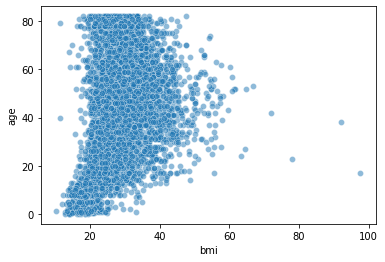

In [ ]:
sns.scatterplot(data=df, y='age', x='bmi', alpha=0.5)

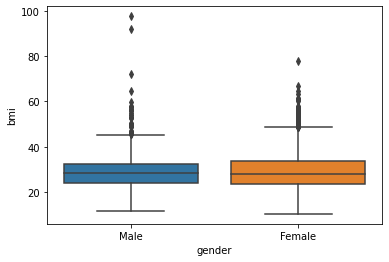

In [ ]:
sns.boxplot(data=df, x='gender', y='bmi') #. interestingly gender does not really correlate with bmi

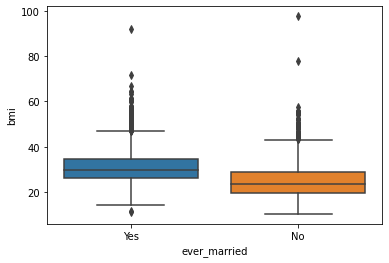

In [ ]:
sns.boxplot(data=df, x='ever_married', y='bmi') #people who ever married had higer bmi values than people who never married.

In [ ]:
df['age'].describe()

count    5109.000000
mean       43.229986
std        22.613575
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [ ]:
df['age_groups'] = pd.cut(df['age'], bins=[0,20,40,60,80,100], labels=['0-20','20-40','40-60','60-80','above 80'])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_n,ever_married_n,Residence_type_n,age_groups
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,0,60-80
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,1,1,60-80
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,1,60-80
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,0,40-60
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,1,60-80


In [ ]:
df['age_groups'].value_counts()

40-60       1562
20-40       1218
60-80       1188
0-20        1025
above 80     116
Name: age_groups, dtype: int64

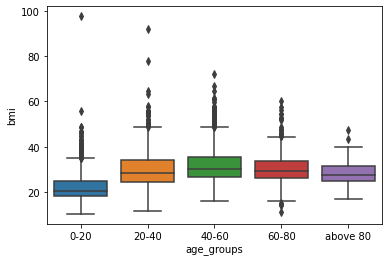

In [ ]:
sns.boxplot(data=df, x='age_groups', y='bmi')

In [ ]:
df.groupby(['age_groups'])['bmi'].median()

age_groups
0-20        20.6
20-40       28.3
40-60       30.3
60-80       29.3
above 80    27.5
Name: bmi, dtype: float64

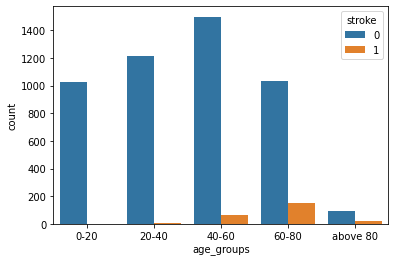

In [ ]:
sns.countplot(data=df, x='age_groups', hue='stroke')

In [ ]:
df.groupby(['age_groups','ever_married'])['bmi'].median()

age_groups  ever_married
0-20        No              20.60
            Yes             26.30
20-40       No              27.20
            Yes             29.10
40-60       No              29.40
            Yes             30.50
60-80       No              31.00
            Yes             29.10
above 80    No              26.25
            Yes             27.80
Name: bmi, dtype: float64

In [ ]:
df['bmi'] = df.groupby(['age_groups','ever_married'])['bmi'].transform(lambda x:x.fillna(x.median()))

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
gender_n             0
ever_married_n       0
Residence_type_n     0
age_groups           0
dtype: int64

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_n,ever_married_n,Residence_type_n,age_groups
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,0,60-80
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.1,never smoked,1,0,1,1,60-80
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,1,60-80
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,0,40-60
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,1,60-80


In [ ]:
y= df['stroke']

In [ ]:
X = df.drop(['gender', 'ever_married','Residence_type','age_groups', 'stroke'], axis=1)

In [ ]:
X_with_age_groups = df.drop(['gender', 'ever_married','Residence_type','age', 'stroke'], axis=1)

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_with_age_groups = pd.get_dummies(X_with_age_groups, drop_first=True)

In [ ]:
#X

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_with_age_groups, y, test_size=0.30, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
scaled_X_train_a = scaler.fit_transform(X_train_a)
scaled_X_test_a = scaler.transform(X_test_a)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def eval(ml_model):
  model = ml_model()
  model.fit(scaled_X_train, y_train)
  pred = model.predict (scaled_X_test)
  print(ml_model)
  print(classification_report(y_test, pred))
  print('\n')
  print(confusion_matrix(y_test, pred))
  print('\n')

In [ ]:
def eval_a(ml_model):
  model = ml_model()
  model.fit(scaled_X_train_a, y_train_a)
  pred = model.predict (scaled_X_test_a)
  print(ml_model)
  print(classification_report(y_test_a, pred))
  print('\n')
  print(confusion_matrix(y_test_a, pred))
  print('\n')

In [ ]:
for m in [LogisticRegression,RandomForestClassifier, GradientBoostingClassifier, SVC, KNeighborsClassifier, DecisionTreeClassifier]:
  eval(m)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533



[[1444    0]
 [  88    1]]


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



[[1442    2]
 [  89    0]]


<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for m in [LogisticRegression,RandomForestClassifier, GradientBoostingClassifier, SVC, KNeighborsClassifier, DecisionTreeClassifier]:
  eval_a(m)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533



[[1444    0]
 [  88    1]]


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



[[1443    1]
 [  89    0]]


<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



[[1440    4]
 [  89    0]]


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.14      0.13      0.14        89

    accuracy                           0.90      1533
   macro avg       0.54      0.54      0.54      1533
weighted avg       0.90      0.90      0.90      1533



[[1369   75]
 [  77   12]]


